## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_metadata['Mouse ID'].unique())

249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#study_results[['Mouse ID','Timepoint']].value_counts()
duplicated_mouse= combined.loc[combined.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicated_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined[combined["Mouse ID"]=='g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clear_df=combined.drop(combined[combined['Mouse ID']=='g989'].index)
clear_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clear_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
clear_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avg=(clear_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].to_frame()).rename(columns={'Tumor Volume (mm3)':'Mean'})
median=(clear_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].to_frame()).rename(columns={'Tumor Volume (mm3)':'Median'})
variance=(clear_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].to_frame()).rename(columns={'Tumor Volume (mm3)':'var'})
standard_dev=(clear_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].to_frame()).rename(columns={'Tumor Volume (mm3)':'std'})
sem=(clear_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].to_frame()).rename(columns={'Tumor Volume (mm3)':'sem'})
summary_pandas=pd.concat([avg,median,variance,standard_dev,sem],axis=1)
summary_pandas

,Mean,Median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary=clear_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
summary.rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.','sem':'Tumor Volume Std. Err.'})
summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

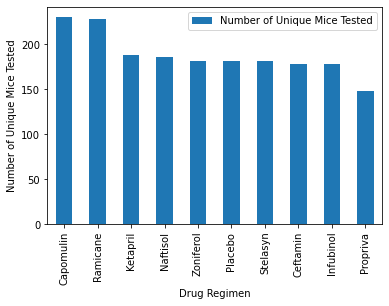

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
count_mice=clear_df.groupby('Drug Regimen').count()['Mouse ID'].to_frame()
count_mice_pd=count_mice.copy()
count_mice_pd.sort_values(by='Mouse ID',ascending=False,inplace=True)
count_mice_pd=count_mice_pd.rename(columns={'Mouse ID':'Number of Unique Mice Tested'})
count_mice_pd.plot(kind='bar')
plt.ylabel("Number of Unique Mice Tested")
plt.show()

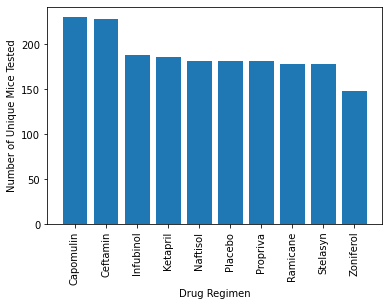

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
count_mice=clear_df.groupby('Drug Regimen').count()['Mouse ID'].to_frame()
drugs=count_mice.index.tolist()
count=count_mice['Mouse ID'].sort_values(ascending=False)
x_axis=np.arange(0,len(drugs))
tick_locations=[value for value in x_axis]
plt.bar(x_axis,count)
plt.xticks(tick_locations,drugs,rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()


Text(0, 0.5, 'Sex')

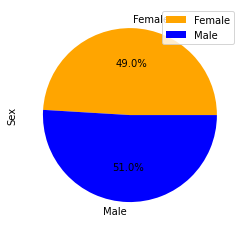

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df=clear_df[['Mouse ID','Sex']]
gender_distribution=gender_df.groupby('Sex').count()
total=gender_distribution['Mouse ID'].sum()
gender_distribution['percentage']=(gender_distribution['Mouse ID']/total)
gender_distribution['percentage']=gender_distribution['percentage'].map('{:.0%}'.format)
gender_distribution
gender_distribution.plot(kind='pie',y='Mouse ID',autopct='%1.1f%%',colors = ['orange', 'blue'])
plt.ylabel('Sex')

Text(0, 0.5, 'Sex')

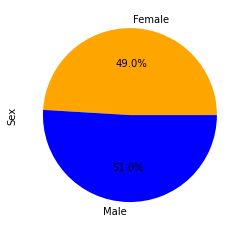

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=gender_distribution.index.to_list()
size=gender_distribution['Mouse ID'].to_list()
colors=['orange','blue']
plt.pie(size,labels=labels,colors=colors,autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_treatment=clear_df[(combined['Drug Regimen']=='Capomulin')|(combined['Drug Regimen']=='Ramicane')|(combined['Drug Regimen']=='Infubinol')|(combined['Drug Regimen']=='Ceftamin')]
sorted_treatment=four_treatment.sort_values(by=['Mouse ID','Timepoint'])
keep_last=sorted_treatment.drop_duplicates(subset='Mouse ID',keep='last')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


<ipython-input-25-55d9eb702a1d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  four_treatment=clear_df[(combined['Drug Regimen']=='Capomulin')|(combined['Drug Regimen']=='Ramicane')|(combined['Drug Regimen']=='Infubinol')|(combined['Drug Regimen']=='Ceftamin')]


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


    
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

drugs=keep_last['Drug Regimen'].unique().tolist()
for drug in drugs:
    drug_info=keep_last[keep_last['Drug Regimen']==str(f"{drug}")]
    tumor_vol=drug_info['Tumor Volume (mm3)']
    tumor_vol_df=tumor_vol.to_frame()
    quartiles_drug=tumor_vol.quantile([.25,.5,.75])
    lowerq_drug=quartiles_drug[0.25]
    upperq_drug=quartiles_drug[.75]
    IQR_drug=upperq_drug-lowerq_drug
    lower_bound_drug=lowerq_drug-(1.5*IQR_drug)   
    upper_bound_drug=upperq_drug+(1.5*IQR_drug)
    outliners=tumor_vol_df[(tumor_vol_df['Tumor Volume (mm3)']<lower_bound_drug)|(tumor_vol_df['Tumor Volume (mm3)']>upper_bound_drug)]
    print(f"{drug}'s potential outliners:{outliners['Tumor Volume (mm3)']}")

Infubinol's potential outliners:420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliners:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
ceftamin=keep_last[keep_last['Drug Regimen']=="Ceftamin"]
ceftamin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1856,a275,45,62.999356,3,Ceftamin,Female,20,28
194,b447,0,45.000000,0,Ceftamin,Male,2,30
1150,b487,25,56.057749,1,Ceftamin,Female,6,28
1405,b759,30,55.742829,1,Ceftamin,Female,12,25
882,f436,15,48.722078,2,Ceftamin,Female,3,25
463,h531,5,47.784682,0,Ceftamin,Male,5,27
1772,j296,45,61.849023,3,Ceftamin,Female,24,30
1858,k210,45,68.923185,3,Ceftamin,Male,15,28
1810,l471,45,67.748662,1,Ceftamin,Female,7,28
1435,l490,30,57.918381,3,Ceftamin,Male,24,26


In [17]:
keep_last.shape

(100, 8)

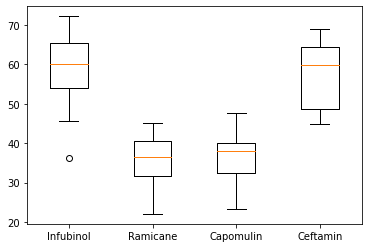

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
inf=keep_last[keep_last['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].to_list()
ram=keep_last[keep_last['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].to_list()
cap=keep_last[keep_last['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].to_list()
cef=keep_last[keep_last['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].to_list()

boxplot_dict={'Infubinol':inf,'Ramicane':ram,'Capomulin':cap,'Ceftamin':cef}
fig,ax=plt.subplots()
ax.boxplot(boxplot_dict.values())
ax.set_xticklabels(boxplot_dict.keys())
plt.show()


## Line and Scatter Plots

<ipython-input-19-ba86389421a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capomulin.sort_values(by=['Mouse ID','Timepoint'],ascending=True,inplace=True)


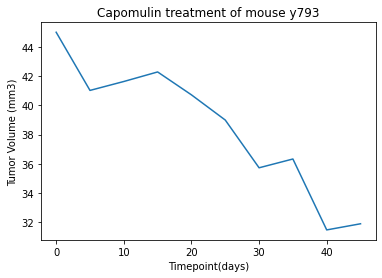

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin=combined[combined['Drug Regimen']=='Capomulin']
capomulin.sort_values(by=['Mouse ID','Timepoint'],ascending=True,inplace=True)
y793_timepoint=capomulin[capomulin['Mouse ID']=='y793']['Timepoint']
y793_vol=capomulin[capomulin['Mouse ID']=='y793']['Tumor Volume (mm3)']
plt.plot(y793_timepoint,y793_vol)
plt.xlabel("Timepoint(days)")
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse y793')
plt.show()

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

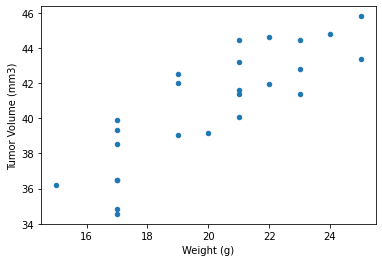

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin=combined[combined['Drug Regimen']=='Capomulin']
capomulin_avg=(capomulin.groupby('Mouse ID').mean())[['Weight (g)','Tumor Volume (mm3)']]
capomulin_avg.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)')

## Correlation and Regression

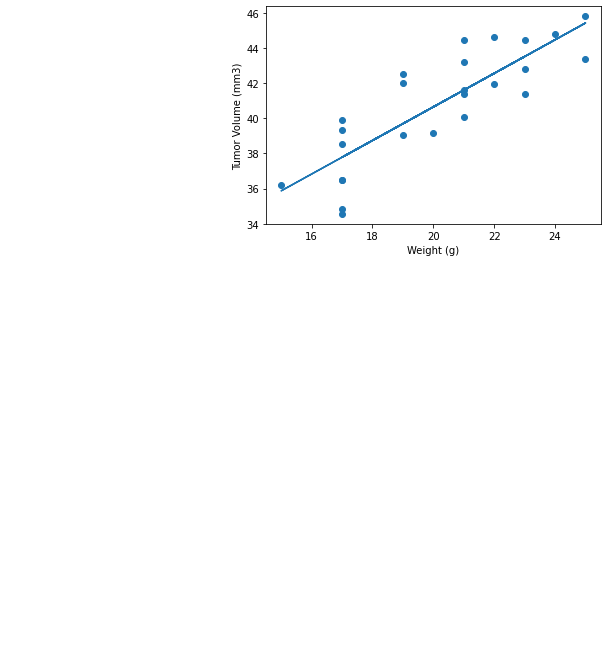

The correlation between mouse weight and the average tumor volume is 0.84


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_value=capomulin_avg['Weight (g)']
y_value=capomulin_avg['Tumor Volume (mm3)']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
regress_value=x_value*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_value)
plt.annotate(line_eq,(6,10),color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

correlation=round(rvalue,2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")